In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
dataset=pd.read_csv("Emp.csv")
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#Data Visualization

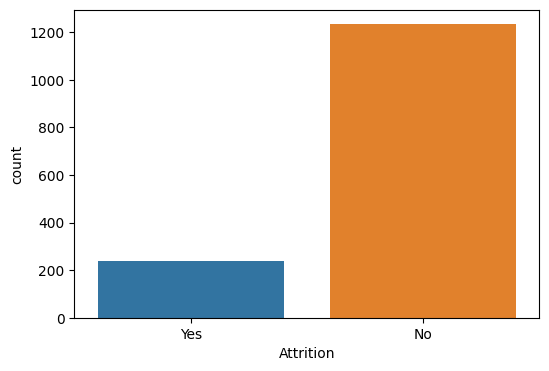

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition',data=dataset)
plt.show()

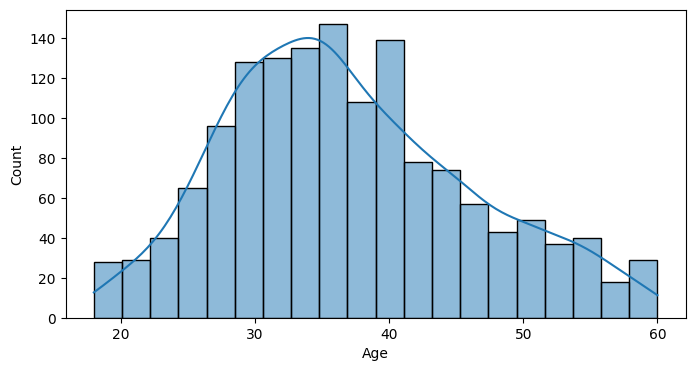

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(dataset['Age'],bins=20,kde=True)
plt.show()

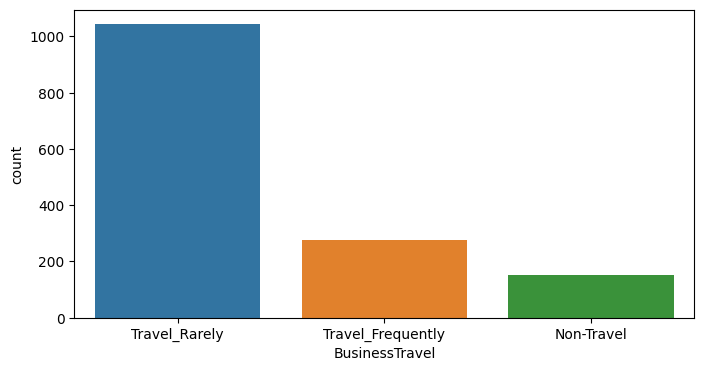

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='BusinessTravel',data=dataset)
plt.show()

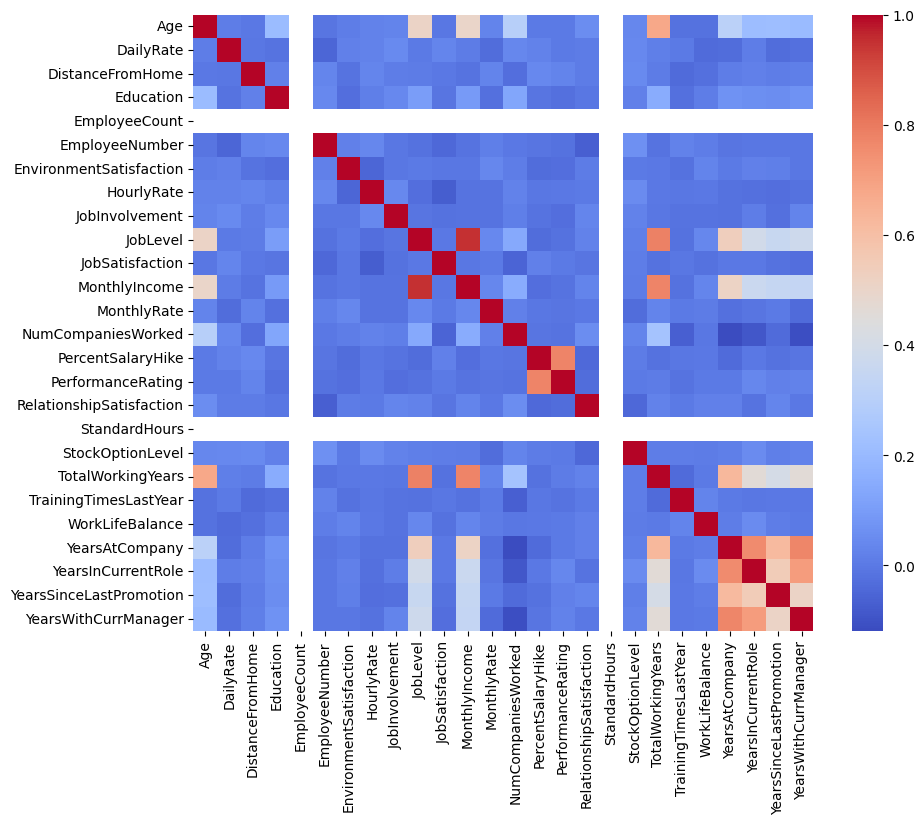

In [10]:
num_features=dataset.select_dtypes(include=['int64','float64']).columns
corr_matrix=dataset[num_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm')
plt.show()

In [11]:
#Outlier Detection

In [12]:
z_scores=np.abs(stats.zscore(dataset[num_features]))
threshold=5
outlier_indices=(z_scores>threshold).any(axis=1)
outliers=dataset[outlier_indices]

print(outliers)

     Age Attrition BusinessTravel  DailyRate              Department  \
126   58       Yes  Travel_Rarely        147  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
126                23          4        Medical              1   

     EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
126             165  ...                         4            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
126                 1                 40                      3   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
126               2              40                 10   

     YearsSinceLastPromotion  YearsWithCurrManager  
126                       15                     6  

[1 rows x 35 columns]


In [13]:
#Splitting into Independent and Dependent Variables

In [14]:
X=dataset.drop('Attrition',axis=1)
y=dataset['Attrition']

In [15]:
#Encoding Categorical Variables

In [16]:
cat_columns=["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime","Over18"]
X_encoded=pd.get_dummies(X,columns=cat_columns)

In [17]:
#Splitting into Training and Test sets

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=42)
y_train=y_train.map({'Yes':1,'No':0})

In [19]:
#Training the Model

In [29]:
regressor=LogisticRegression(random_state=42,solver='lbfgs', max_iter=10000)
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
y_pred=np.where(y_pred==0,'No','Yes')

y_test=y_test.astype(str)

In [30]:
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

In [31]:
print(accuracy)
print(conf_matrix)
print(class_report)

0.8809523809523809
[[244  11]
 [ 24  15]]
              precision    recall  f1-score   support

          No       0.91      0.96      0.93       255
         Yes       0.58      0.38      0.46        39

    accuracy                           0.88       294
   macro avg       0.74      0.67      0.70       294
weighted avg       0.87      0.88      0.87       294



In [32]:
#Random Forest Method

In [ ]:
rand_forest=RandomForestClassifier(random_state=42)
rand_forest.fit(X_train,y_train)

y_pred=rand_forest.predict(X_test)

In [35]:
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred)
class_report2 = classification_report(y_test, y_pred)

In [36]:
print(accuracy2)
print(conf_matrix2)
print(class_report2)

0.8809523809523809
[[244  11]
 [ 24  15]]
              precision    recall  f1-score   support

          No       0.91      0.96      0.93       255
         Yes       0.58      0.38      0.46        39

    accuracy                           0.88       294
   macro avg       0.74      0.67      0.70       294
weighted avg       0.87      0.88      0.87       294

